# PyTorch Computer Vision with Convolutional Nueral Networks


In [134]:
# Imports
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.0
0.17.0


## 1. Getting a dataset (using FashionMNIST dataset)


In [135]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

# Setup the testing data
test_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=False,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

In [136]:
len(train_data), len(test_data)

(60000, 10000)

In [137]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [138]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [139]:
# view labels and corresponding index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [140]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

# gray scale images have one colour channel
# Coloured images have 3 colour channels for R, G, B
# for grayscale images a black image as a value of 0, white has 1

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


In [141]:
# Matplotlib expect colour channels to come last, therefore use .squeeze() to remove the singular dimension
image.shape

torch.Size([1, 28, 28])

In [142]:
image.squeeze().shape

torch.Size([28, 28])

Text(0.5, 1.0, '9')

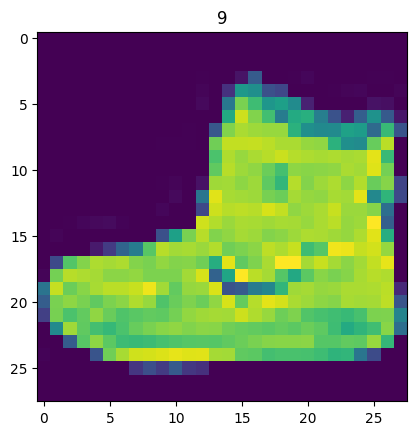

In [143]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

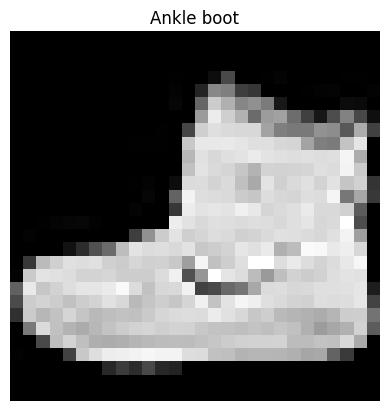

In [144]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

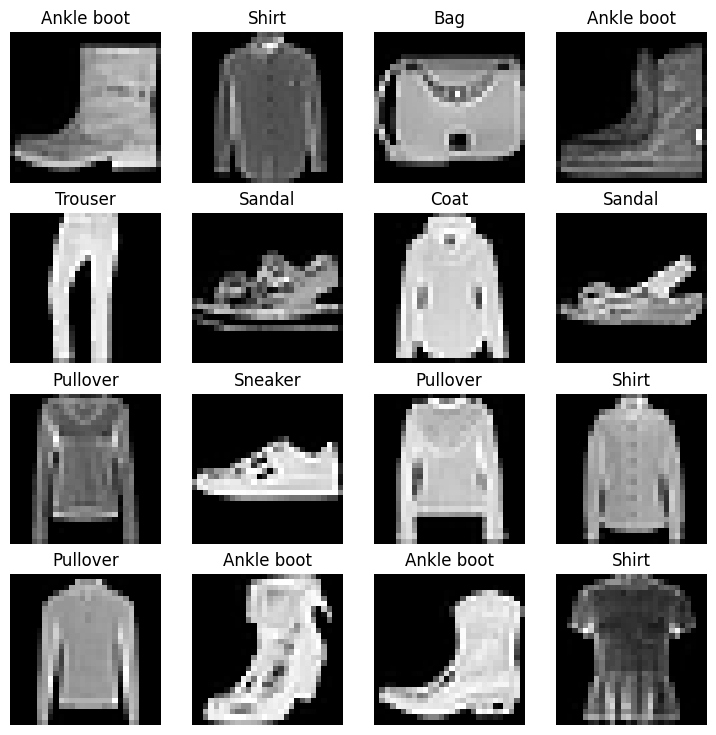

In [145]:
# Plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1): # range 1-16 (for 16 images)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i) # add the random_photo at the ith index
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [146]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 2. Prepare DataLoader

- Convert from dataset into DataLoader
- Dataloader turns a dataset into a Python iterable
- Turn our data into mini-batches for computational efficiency and to gice our nn more chances to update gradients per epoch


In [147]:
# Turn train and test data into dataLoader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # so that our model doesn't learn order

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23ce046b860>,
 <torch.utils.data.dataloader.DataLoader at 0x23cc2d790a0>)

In [148]:
# Check what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}\n")
print(f"Length of train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...\n")
print(f"Length of test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023CE046B860>, <torch.utils.data.dataloader.DataLoader object at 0x0000023CC2D790A0>)

Length of train DataLoader: 1875 batches of 32...

Length of test DataLoader: 313 batches of 32...


In [149]:
# Check what's inside the training DataLoader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8


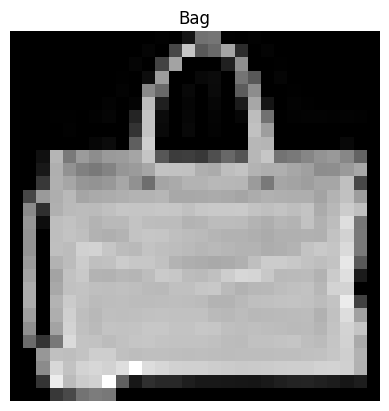

In [150]:
# show a sample from a batch
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}")

## 3. Building a baseline model

- A simple model to be imporoved upon by subsequent experimentation


In [151]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} ->[color_channels, height, width]")
print(f"Shape after flattening: {output.shape} ->[color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) ->[color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) ->[color_channels, height*width]


In [152]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [153]:
torch.manual_seed(42)

# Instantiate the model
model_1 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=20,
    output_shape=len(class_names)
).to("cpu")

model_1

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [154]:
dummy_x = torch.rand(32, 1, 28, 28)
model_1(dummy_x)

# The output is one logit per class

tensor([[-0.0898,  0.4250,  0.0166, -0.2554, -0.0252, -0.2772,  0.0576,  0.1981,
         -0.0374,  0.0360],
        [ 0.0997,  0.4825, -0.1986, -0.1887, -0.2178, -0.0954,  0.1579,  0.1022,
         -0.0337,  0.3940],
        [-0.0992,  0.4910, -0.0784, -0.2031, -0.1534, -0.2162,  0.1320,  0.1050,
         -0.1307,  0.1744],
        [-0.0186,  0.4170, -0.2152, -0.2134, -0.2737, -0.1609,  0.2813, -0.0174,
         -0.1199,  0.1243],
        [-0.0336,  0.5537, -0.2254, -0.2452, -0.1191, -0.2205,  0.1796,  0.0772,
          0.0325,  0.1196],
        [ 0.0050,  0.4850, -0.2378, -0.1749, -0.2431, -0.2195,  0.1822,  0.3425,
         -0.2693,  0.1282],
        [ 0.0592,  0.5591, -0.1594, -0.1924, -0.2296, -0.1486,  0.2308,  0.1919,
         -0.1654,  0.2871],
        [-0.0789,  0.3924,  0.0054, -0.3768, -0.2152, -0.2342,  0.1831,  0.1413,
         -0.0277,  0.3662],
        [-0.0471,  0.2073, -0.1354, -0.2559, -0.3300, -0.1779, -0.0651,  0.2318,
         -0.1512,  0.1832],
        [ 0.0460,  

In [155]:
# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [156]:
# Import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

In [157]:
# Create a function to time our experiments
from timeit import default_timer as Timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    
    """Prints difference between start time and end time"""

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## Note

- Loop through epochs
- Loop through training batches, performing train steps, calculate train loss per batch
- Loop through testing batches, performing test steps, calculate test loss per batch


In [158]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = Timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader): # we update ou model parameters once per batch
        model_1.train()

        # Forward pass
        y_pred = model_1(X)

        # Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train_loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward Pass
            test_pred = model_1(X_test)

            # Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # raw outputs are going to be logits, find logits value with highest value
        
        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

        # Print out what's happening
        print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
    
    # Calculate training time
    train_time_end_on_cpu = Timer()
    total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples


Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:18<00:36, 18.07s/it]


Train loss: 0.5824 | Test loss: 0.5039, Test acc: 82.2983
Train time on cpu: 18.072 seconds
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:33<00:16, 16.64s/it]


Train loss: 0.4747 | Test loss: 0.4823, Test acc: 83.0871
Train time on cpu: 33.716 seconds
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:49<00:00, 16.51s/it]


Train loss: 0.4542 | Test loss: 0.4772, Test acc: 83.4365
Train time on cpu: 49.523 seconds


- We'll try to improve on our baseline


# Make predictions and get model 1 results (Functionize the evaluation code)


In [159]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    """Returns a dictionary containing the results of model predictions on data_loader"""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
    
# Calculate model_1 results on the test dataset
model_1_results = eval_model(model=model_1,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn)

model_1_results

100%|██████████| 313/313 [00:01<00:00, 159.73it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4772161543369293,
 'model_acc': 83.43650159744409}

### Improve our model through experimentation


In [160]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Building a better model with non-linearlity and running on gpu


In [161]:
# Create a model
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [162]:
# Create an instance of a model
torch.manual_seed(42)
model_2 = FashionMNISTModelV1(input_shape=28*28, # output of the nn.Flatten
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [163]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [164]:
# Create a loss function, optimizer and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Turning our training loop and testing loop into reusable functions (Functionizing)


In [165]:
### Training loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training loop step with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for X, y in (data_loader): # to update our model parameters once per batch
        
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # accumulate the train_loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [166]:
### Testing loop
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()
    with torch.inference_mode():

        # Add a loop to loop through the testing batches
        for X, y in data_loader:
            
            # Put data on target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)

            # Calculate loss and accuracy (per batch)
            test_loss = loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # accumulate the train_loss

        # Adjust metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        # Print out what's happening
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")
    

### Leverage out train and test step functions to train model 2


In [167]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_on_gpu = Timer()

# Import tqdm for progress bar
from tqdm.auto import tqdm

epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = Timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------


Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:18<00:37, 18.59s/it]

Test loss: 0.00219 | Test acc: 65.00%

Epoch: 1
------
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:37<00:18, 18.50s/it]

Test loss: 0.00127 | Test acc: 73.91%

Epoch: 2
------
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:55<00:00, 18.59s/it]

Test loss: 0.00127 | Test acc: 75.02%

Train time on cuda: 55.774 seconds


In [168]:
# Train time on CPU
total_train_time_model_1

49.52304159999949

### Evaluate the performance of our model


In [169]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    """Returns a dictionary containing the results of model predictions on data_loader"""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
    
# Calculate model_1 results on the test dataset
model_2_results = eval_model(model=model_2,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn)

model_2_results

  3%|▎         | 10/313 [00:00<00:03, 91.73it/s]

100%|██████████| 313/313 [00:02<00:00, 136.86it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [170]:
# Compare with model_1
model_1_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4772161543369293,
 'model_acc': 83.43650159744409}

### Model 3: Build a Convolutional Nueral Network for better perfomance

- Alias ConvNet
- CNN's find patterns in visual data


In [171]:
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates the TinyVGG model from CNN explainer website"""
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [172]:
# Instantiate
torch.manual_seed(42)
model_3 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### Stepping through nn.Conv2d


In [173]:
# create some dummy data
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [174]:
test_image.shape

torch.Size([3, 64, 64])

In [175]:
# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data throught the conv layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### Stepping through MaxPool2d


In [176]:
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_output = max_pool_layer(conv_output)
max_pool_output.shape

torch.Size([10, 32, 32])

### Training our first CNN


In [177]:
# Setup loss function, optimizer, and eval metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [178]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_3 = Timer()

### Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    train_step(model=model_3,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_3,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_model_3 = Timer()
total_train_time_model_3 = print_train_time(start=train_time_start_model_3,
                                            end=train_time_end_model_3,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------


Train loss: 0.59486 | Train acc: 78.30%


 33%|███▎      | 1/3 [00:29<00:59, 29.69s/it]

Test loss: 0.00061 | Test acc: 85.52%

Epoch: 1
-------
Train loss: 0.35485 | Train acc: 87.30%


 67%|██████▋   | 2/3 [00:58<00:29, 29.41s/it]

Test loss: 0.00066 | Test acc: 87.56%

Epoch: 2
-------
Train loss: 0.31655 | Train acc: 88.57%


100%|██████████| 3/3 [01:28<00:00, 29.41s/it]

Test loss: 0.00060 | Test acc: 88.71%

Train time on cuda: 88.242 seconds


In [179]:
# Get model_3 results
model_3_results = eval_model(model=model_3,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                            )
model_3_results

100%|██████████| 313/313 [00:03<00:00, 98.77it/s] 


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3108287751674652,
 'model_acc': 88.70806709265176}

In [180]:
model_1_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4772161543369293,
 'model_acc': 83.43650159744409}

### Compare model results and training time


In [181]:
import pandas as pd

compare_results = pd.DataFrame([model_1_results,
                               model_2_results,
                               model_3_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477216,83.436502
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.310829,88.708067


In [182]:
# Add training time to results comparisons
compare_results["training_time"] = [total_train_time_model_1,
                                    total_train_time_model_2,
                                    total_train_time_model_3]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477216,83.436502,49.523042
1,FashionMNISTModelV1,0.685001,75.019968,55.774335
2,FashionMNISTModelV2,0.310829,88.708067,88.242426


Text(0, 0.5, 'model')

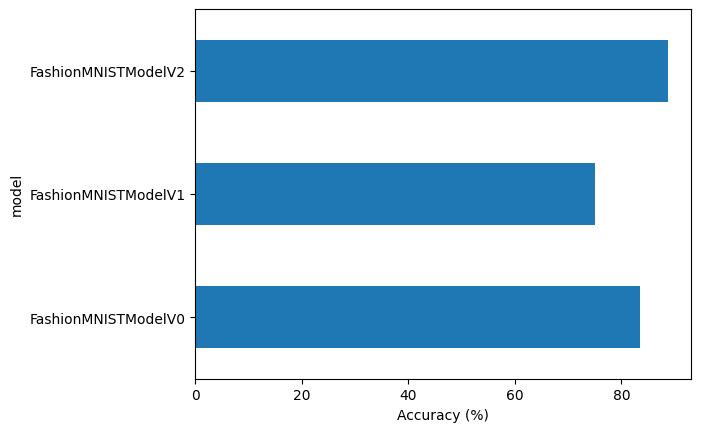

In [183]:
# Visualise our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions with best model


In [184]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logits = model(sample)

            # Get prediction probability
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            # Get pred_probs off the GPU for further calculation
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [185]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

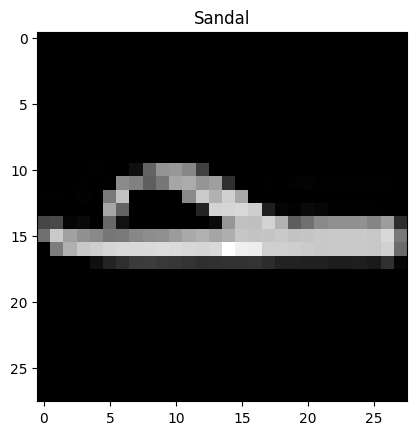

In [186]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [187]:
# Make predictions
pred_probs = make_predictions(model=model_3,
                              data=test_samples)

#Convert pred  probabilities to labels
pred_labels = pred_probs.argmax(dim=1)
pred_labels

tensor([5, 6, 0, 1, 2, 2, 1, 4, 4])

In [188]:
test_labels

[5, 2, 0, 1, 2, 2, 1, 4, 4]

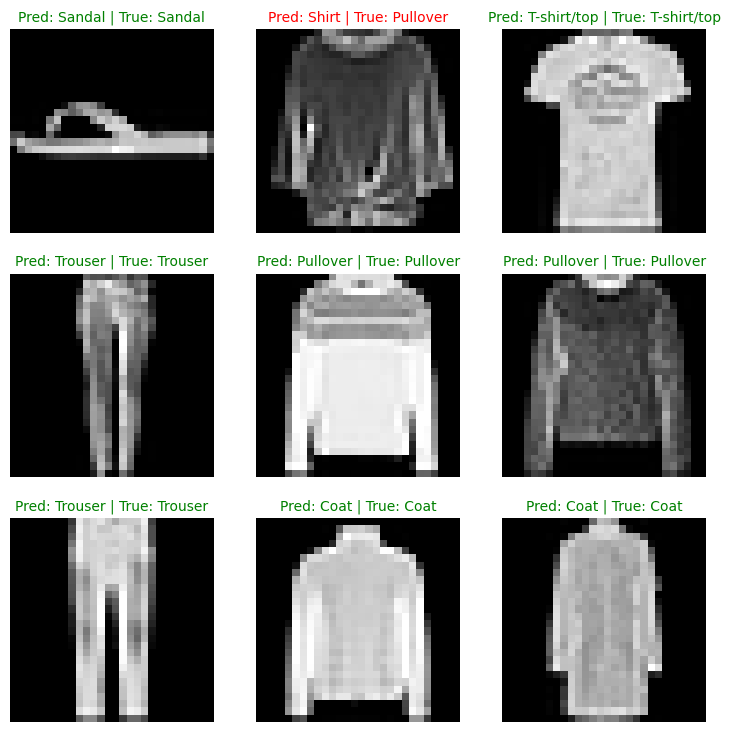

In [189]:
# Plot comparison between pred_labels and test_labels
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction in text form
    pred_label = class_names[pred_labels[i]]

    # Get the true label in text form
    true_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | True: {true_label}"

    # Check for equality between pred and true and change color of title text
    if pred_label == true_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

### Making a confusion matrix for further prediction evaluation


In [200]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_3.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logits = model_3(X)

        # Turn predictions from logits to pred_labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on cpu for evaluation
        y_preds.append(y_pred.cpu())
    
    # Concatenate list of predictions into a tensor
    y_preds_tensor = torch.cat(y_preds)
    y_preds_tensor
    

Making predictions...: 100%|██████████| 313/313 [00:05<00:00, 62.42it/s]


In [202]:
len(y_preds_tensor)

10000

In [203]:
import torchmetrics
import mlxtend

torchmetrics.__version__, mlxtend.__version__

('1.3.1', '0.23.1')

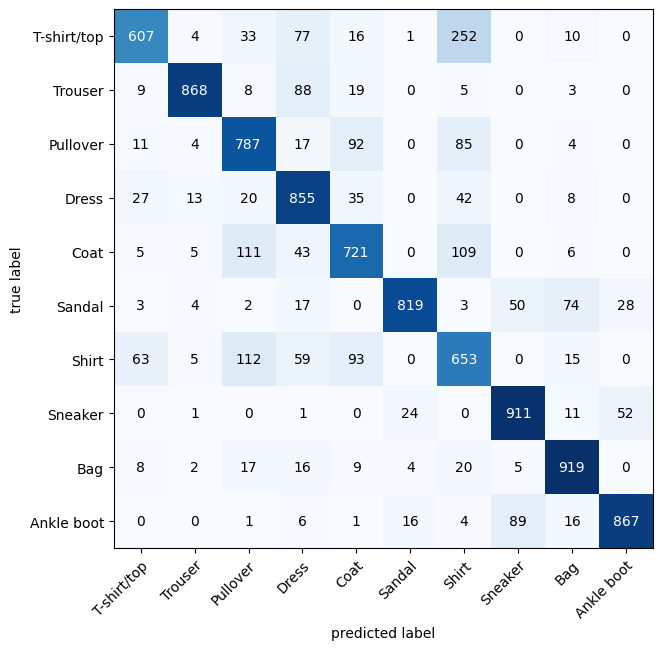

In [209]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets,
                         )

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

### Save and load best perfoming model


In [210]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_model_3.pth


In [212]:
# Create a new instance
torch.manual_seed(42)

loaded_model_3 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_3.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [213]:
# Evaluate the loaded model
model_3_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3108287751674652,
 'model_acc': 88.70806709265176}

In [216]:
torch.manual_seed(42)
loaded_model_3_results = eval_model(model=loaded_model_3,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)

loaded_model_3_results

  1%|          | 3/313 [00:00<00:11, 28.14it/s]

100%|██████████| 313/313 [00:03<00:00, 84.67it/s] 


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3108287751674652,
 'model_acc': 88.70806709265176}

In [222]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_3_results["model_loss"]),
              torch.tensor(loaded_model_3_results["model_loss"]))

tensor(True)